# Additional analysis for project

---

## Imports

#### Python libraries

In [1]:
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

import sys

#### Ancillary modules

In [2]:
sys.path.append("../")

In [3]:
%load_ext autoreload
%autoreload 2

from utils.functions import (
    json_dump_dict,
    adding_cluster_feature,
    cluster_dictionary,
    finding_clusters_match,
    clustering_dataframes,
    display_confusion_matrix,
    render_mpl_table
)

from utils.parameters import (
    gm_rename,
    yr,
    original_features
)

#### Data

In [4]:
df_ime_cmp = pd.read_csv("../base.csv")
df_ime_cmp["GM"] = df_ime_cmp["GM"].map(gm_rename)
df_ime = df_ime_cmp.loc[df_ime_cmp["A.O"] == yr, :].copy()
df_ime

,Unnamed: 0,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
160,161,1,Aguascalientes,1312544,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60,-0.89,1_bajo,28,2015
161,162,2,Baja California,3315766,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85,-1.10,0_muy_bajo,30,2015
162,163,3,Baja California Sur,712029,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37,-0.60,1_bajo,22,2015
163,164,4,Campeche,899931,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69,0.46,3_alto,10,2015
164,165,5,Coahuila de Zaragoza,2954915,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94,-1.10,0_muy_bajo,29,2015
165,166,6,Colima,711235,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18,-0.73,1_bajo,26,2015
166,167,7,Chiapas,5217908,14.98,31.71,2.90,2.49,13.45,44.46,11.78,57.86,62.46,2.41,4_muy_alto,2,2015
167,168,8,Chihuahua,3556574,2.67,12.65,1.40,1.81,2.39,22.16,1.76,17.05,34.77,-0.60,1_bajo,23,2015
168,169,9,Distrito Federal,8918653,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26,-1.45,0_muy_bajo,32,2015
169,170,10,Durango,1754754,3.17,14.50,3.68,2.63,3.26,24.58,4.33,36.19,39.16,0.05,2_medio,13,2015


In [5]:
df_pca = pd.read_csv("../PCA_" + str(yr) + ".csv")
df_pca["GM"] = df_pca["GM"].map(gm_rename)
df_pca["A.O"] = yr
df_pca["NOM_ENT"] = df_ime["NOM_ENT"].values
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,GM,IM,A.O,NOM_ENT
0,0.269620,-0.113965,-0.261277,-1.612777,0.324033,-0.846347,-1.390839,0.567933,0.290341,1_bajo,-0.89,2015,Aguascalientes
1,-0.335337,-0.959529,-1.054806,-1.758219,0.791750,-0.626450,-1.423188,-0.090906,0.651541,0_muy_bajo,-1.10,2015,Baja California
2,-0.653157,-1.394756,-1.212477,-0.915667,0.827089,-0.286395,-0.265681,-0.323714,0.041897,1_bajo,-0.60,2015,Baja California Sur
3,-0.777755,0.424305,0.527911,1.181694,-0.019949,0.123097,0.654695,-0.498211,0.480702,3_alto,0.46,2015,Campeche
4,-0.258940,-0.627961,-0.687780,-1.725634,0.810748,-0.667188,-1.553966,0.303953,0.801587,0_muy_bajo,-1.10,2015,Coahuila de Zaragoza
5,-0.287075,0.036806,-0.729433,-1.351342,0.137754,0.004243,-1.316960,0.092111,0.425968,1_bajo,-0.73,2015,Colima
6,-0.084164,2.235367,0.304409,3.806538,-1.096594,2.118506,3.455188,-0.362254,-1.883982,4_muy_alto,2.41,2015,Chiapas
7,-0.281021,-0.964658,-0.242980,-0.199893,0.355537,-0.784693,-1.641772,-0.002051,-0.456718,1_bajo,-0.60,2015,Chihuahua
8,0.009963,-0.937684,-0.979999,-2.138000,1.360699,-0.529587,-2.333214,0.601750,0.821060,0_muy_bajo,-1.45,2015,Distrito Federal
9,-0.222079,-1.288662,0.565867,0.911654,-0.562403,-0.802313,-0.635146,0.151415,-0.976951,2_medio,0.05,2015,Durango


---

## Clustering exercise

### Clustering algorithm

In [6]:
df_ime = adding_cluster_feature(df_ime, "orig")

Features fed for clustering analysis (9):
1. ANALF
2. SPRIM
3. OVSDE
4. OVSEE
5. OVSAE
6. VHAC
7. OVPT
8. PL.5000
9. PO2SM


In [7]:
gm_dict, c_dict, df_ime = cluster_dictionary(df_ime)

In [8]:
gm_df, c_df = clustering_dataframes(gm_dict, c_dict)

### Results analysis

#### Dataframe comparison

In [9]:
print("\nClasificación original de los estados:")
gm_df


Clasificación original de los estados:


0_muy_bajo               1_bajo       2_medio  \
2015 0       Baja California       Aguascalientes       Durango   
     1  Coahuila de Zaragoza  Baja California Sur    Guanajuato   
     2      Distrito Federal               Colima       Morelos   
     3            Nuevo León            Chihuahua       Nayarit   
     4                     -              Jalisco  Quintana Roo   
     5                     -               México       Sinaloa   
     6                     -            Querétaro       Tabasco   
     7                     -               Sonora      Tlaxcala   
     8                     -           Tamaulipas     Zacatecas   

                                 3_alto 4_muy_alto  
2015 0                         Campeche    Chiapas  
     1                          Hidalgo   Guerrero  
     2              Michoacán de Ocampo     Oaxaca  
     3                           Puebla          -  
     4                  San Luis Potosí          -  
     5  Veracruz de Ignacio de la Llave          -  
     6                          Yucatán          -  
     7                                -          -  
     8                                -          -

In [10]:
print("\nClasificación usando features originales (9):")
# print("\nClasificación usando componentes principales (5):")
c_df


Clasificación usando features originales (9):


0_muy_bajo               1_bajo     2_medio  \
2015 0                Baja California       Aguascalientes    Campeche   
     1           Coahuila de Zaragoza  Baja California Sur     Durango   
     2               Distrito Federal               Colima  Guanajuato   
     3                     Nuevo León            Chihuahua     Morelos   
     4                              -              Jalisco     Nayarit   
     5                              -               México   Querétaro   
     6                              -         Quintana Roo     Sinaloa   
     7                              -               Sonora     Yucatán   
     8                              -           Tamaulipas           -   
     ----------            ----------           ----------  ----------   
     Correct                        4                    8           5   
     Incorrect                      0                    1           3   
     Missing                        0                    1           4   

                                          3_alto  4_muy_alto  
2015 0                                   Hidalgo     Chiapas  
     1                       Michoacán de Ocampo    Guerrero  
     2                                    Puebla      Oaxaca  
     3                           San Luis Potosí           -  
     4                                   Tabasco           -  
     5                                  Tlaxcala           -  
     6           Veracruz de Ignacio de la Llave           -  
     7                                 Zacatecas           -  
     8                                         -           -  
     ----------                       ----------  ----------  
     Correct                                   5           3  
     Incorrect                                 3           0  
     Missing                                   2           0

#### Confusion matrix


Matriz de confusión usando features originales (9):


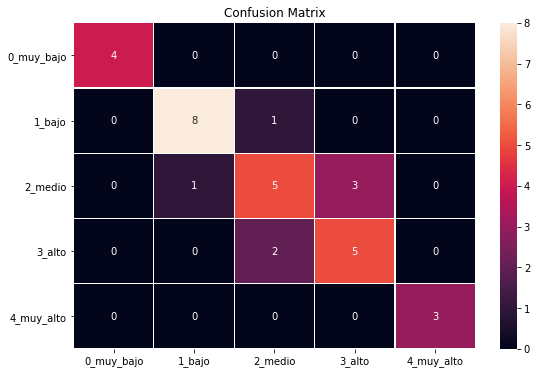

In [11]:
print("\nMatriz de confusión usando features originales (9):")
# print("\nClasificación usando componentes principales (5):")
display_confusion_matrix(df_ime)

---

## *Notes*

- Sources
    - [An Introduction to Clustering Algorithms in Python](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)

---

### Creating features dicts

---
---